###Gender Distribution:

Calculate the proportion of males, females, and transgender individuals in the workforce.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/plfs.xlsx")
df.head()

,State / UT,Male,Female,Transgender,self-employed,regular wage /\nsalary earning,casual labour,others,not\nliterate,literate\n& upto\nprimary,...,diploma/\ncertificate\ncourse,graduate,post\ngraduate\n& above,secondary\n& above,sample households,0-4 years,5-14 years,15-29 years,15-59 years,15 yrs & above
0,Andhra Pradesh,2972.0,3007,1,29.2,37.3,11.0,22.5,20.2,14.0,...,2.0,16.2,5.3,53.2,1766,327,756.000,1633,4242,4897
1,Arunachal Pradesh,1346.0,1266,0,37.2,51.2,4.7,6.9,10.6,14.6,...,0.2,16.3,2.7,49.0,640,188,428.000,849,1898,1996
2,Assam,1716.0,1589,0,39.7,40.8,10.7,8.8,6.3,14.6,...,0.5,19.1,3.9,53.1,893,166,451.000,845,2305,2688
3,Bihar,3214.0,2843,0,44.7,27.7,14.4,13.3,18.0,10.3,...,0.1,19.3,3.0,55.5,1344,603,1.093,1702,3838,4361
4,Chhattisgarh,1702.0,1694,0,32.0,46.2,9.2,12.6,14.5,13.9,...,1.4,13.9,7.9,52.9,832,214,478.000,966,2353,2704


In [ ]:
gender_distribution = df[['Male', 'Female', 'Transgender']].sum() / df[['Male', 'Female', 'Transgender']].sum().sum()
gender_distribution

Male           0.498321
Female         0.501655
Transgender    0.000023
dtype: float64

###Employment Status:

Determine the percentage of self-employed, regular wage/salary earning, casual labour, and others in the workforce.


In [ ]:
employment_status = df[['self-employed', 'regular wage /\nsalary earning', 'casual labour', 'others']].sum() / df[['self-employed',
                                            'regular wage /\nsalary earning', 'casual labour', 'others']].sum().sum()
employment_status

self-employed                     0.318894
regular wage /\nsalary earning    0.447846
casual labour                     0.095120
others                            0.138140
dtype: float64

###Literacy and Education Levels:
Calculate the literacy rate and distribution across different education levels (not literate, literate up to primary, middle, secondary, higher secondary, diploma/certificate course, graduate, post-graduate & above).

In [ ]:
literacy_rate = df['not\nliterate'].sum() / df[['not\nliterate', 'literate\n& upto\nprimary', 'middle', 'secondary', 'higher\nsecondary',
                                            'diploma/\ncertificate\ncourse', 'graduate', 'post\ngraduate\n& above']].sum().sum()
literacy_rate
education_distribution = df[['not\nliterate', 'literate\n& upto\nprimary', 'middle', 'secondary', 'higher\nsecondary', 'diploma/\ncertificate\ncourse',
                        'graduate', 'post\ngraduate\n& above']].sum() / df[['not\nliterate', 'literate\n& upto\nprimary', 'middle', 'secondary',
                          'higher\nsecondary', 'diploma/\ncertificate\ncourse', 'graduate', 'post\ngraduate\n& above']].sum().sum()
education_distribution

not\nliterate                    0.101024
literate\n& upto\nprimary        0.134159
middle                           0.204967
secondary                        0.156698
higher\nsecondary                0.159428
diploma/\ncertificate\ncourse    0.017108
graduate                         0.169401
post\ngraduate\n& above          0.057215
dtype: float64

###Age Group Analysis:
Analyze the distribution of age groups (0-4 years, 5-14 years, 15-29 years, 15-59 years, 15 years & above).

In [ ]:
# Convert the relevant columns to a numeric type before performing the calculation
for col in ['0-4 years', '5-14 years', '15-29 years', '15-59 years', '15 yrs & above']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

age_group_distribution = df[['0-4 years', '5-14 years', '15-29 years', '15-59 years', '15 yrs & above']].sum() / df[['0-4 years', '5-14 years', '15-29 years', '15-59 years', '15 yrs & above']].sum().sum()
age_group_distribution

0-4 years         0.051545
5-14 years        0.117674
15-29 years       0.224182
15-59 years       0.277445
15 yrs & above    0.329156
dtype: float64

###Correlation Analysis:

Examine the correlation between education level and employment status.

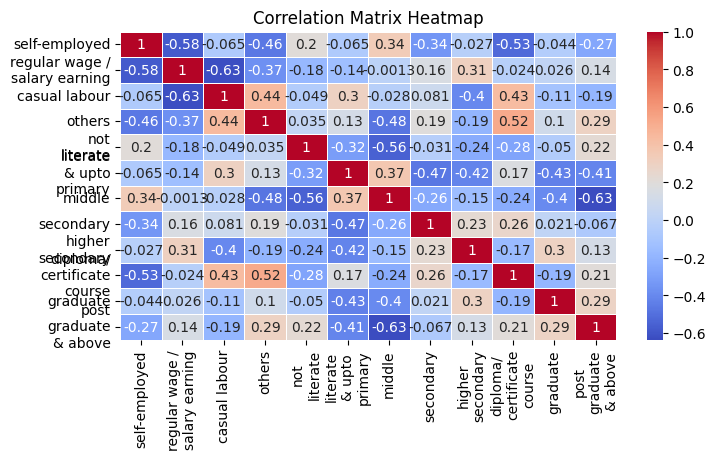

In [ ]:
correlation_matrix = df[['self-employed', 'regular wage /\nsalary earning', 'casual labour', 'others', 'not\nliterate', 'literate\n& upto\nprimary',
                         'middle', 'secondary', 'higher\nsecondary', 'diploma/\ncertificate\ncourse', 'graduate', 'post\ngraduate\n& above']].corr()
correlation_matrix
# Plotting heatmap
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###Examine the correlation between Gender and Employment Status.


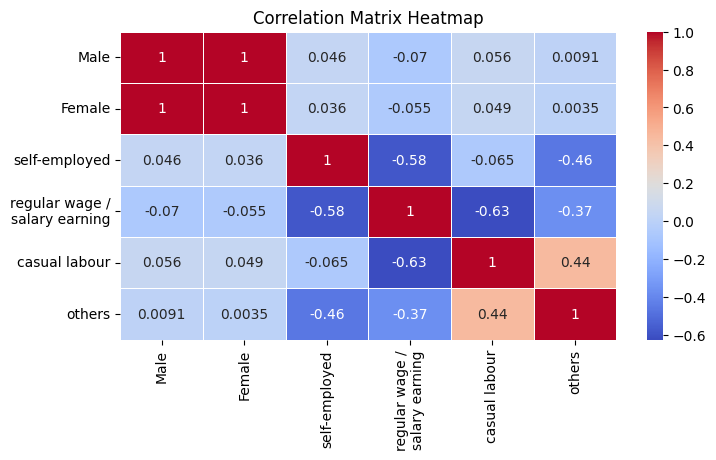

In [ ]:
correlation_matrix1 = df[["Male","Female","self-employed","regular wage /\nsalary earning","casual labour","others"]].corr(method="pearson")
correlation_matrix1
# Plotting heatmap
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###Regional Analysis:

Compare the employment status and education levels across different States/UTs.


In [ ]:
statewise_employment_status = df.groupby('State / UT')[['self-employed', 'regular wage /\nsalary earning', 'casual labour', 'others']].sum()

statewise_education_levels = df.groupby('State / UT')[['not\nliterate', 'literate\n& upto\nprimary', 'middle', 'secondary', 'higher\nsecondary',
                                                       'diploma/\ncertificate\ncourse', 'graduate', 'post\ngraduate\n& above']].sum()
#print(statewise_education_levels)
statewise_employment_status


,self-employed,regular wage /\nsalary earning,casual labour,others
State / UT,,,,
Andaman & N. Island,22.8,50.9,15.7,10.7
Andhra Pradesh,29.2,37.3,11.0,22.5
Arunachal Pradesh,37.2,51.2,4.7,6.9
Assam,39.7,40.8,10.7,8.8
Bihar,44.7,27.7,14.4,13.3
Chandigarh,17.4,62.2,6.8,13.6
Chhattisgarh,32.0,46.2,9.2,12.6
Dadra & Nagar Haveli & Daman & Diu,13.7,79.9,1.7,4.7
Delhi,29.6,52.8,5.0,12.6


###Employment and Literacy Correlation:

Investigate the relationship between literacy levels and different types of employment.

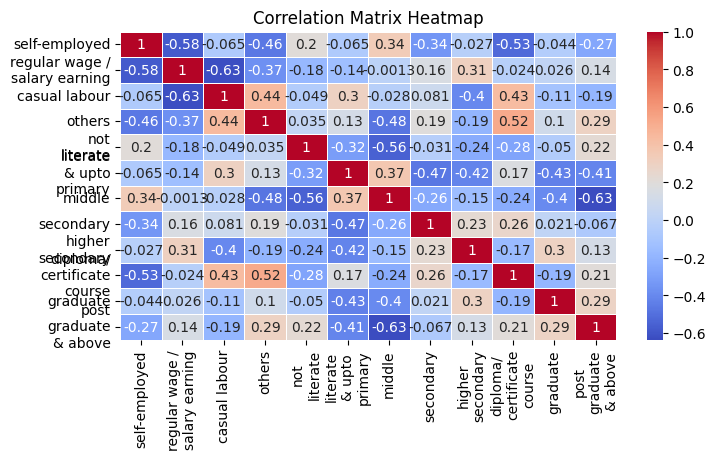

In [ ]:
employment_literacy_correlation = df[['self-employed', 'regular wage /\nsalary earning', 'casual labour', 'others', 'not\nliterate',
                                     'literate\n& upto\nprimary', 'middle', 'secondary', 'higher\nsecondary', 'diploma/\ncertificate\ncourse', 'graduate',
                                     'post\ngraduate\n& above']].corr()
employment_literacy_correlation
# Plotting heatmap
plt.figure(figsize=(8,4))
sns.heatmap(employment_literacy_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###Visualization:

Use visualizations to represent the data for better understanding. This can include bar charts, pie charts, and heatmaps.


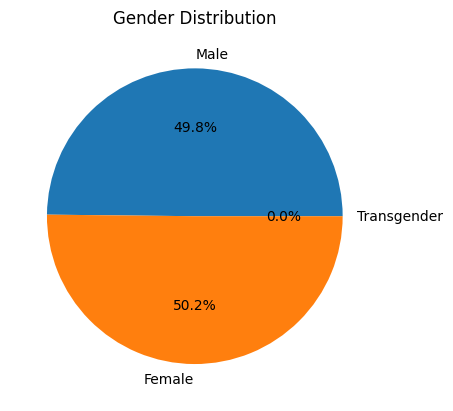

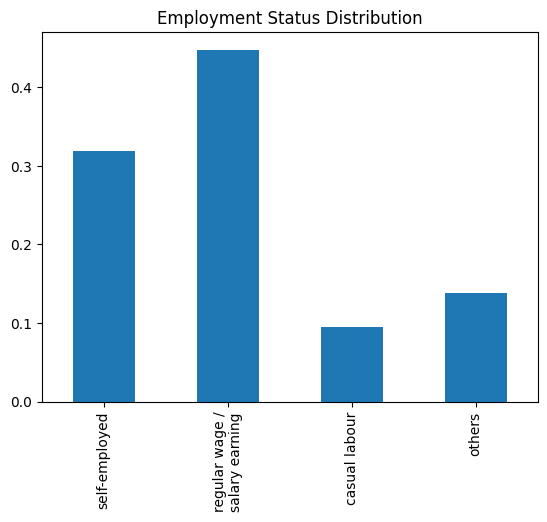

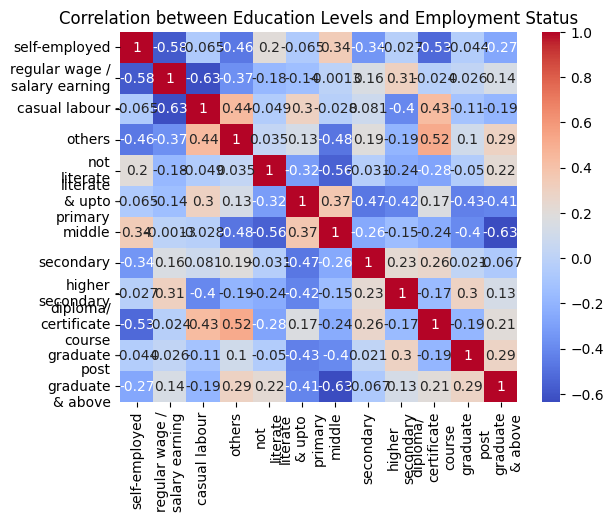

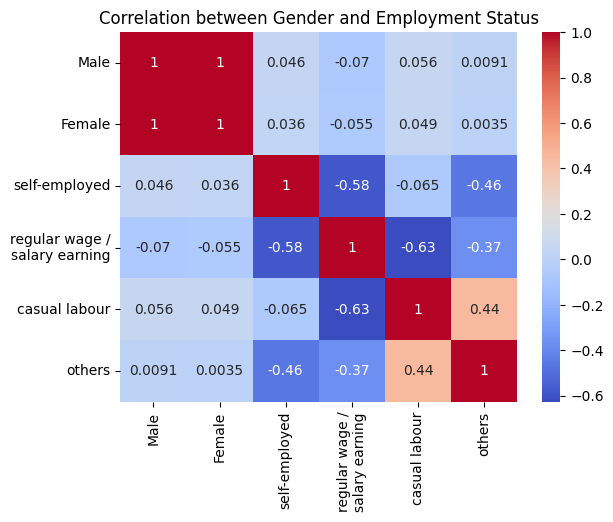

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution Pie Chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Employment Status Bar Chart
employment_status.plot(kind='bar')
plt.title('Employment Status Distribution')
plt.show()

# Education Levels Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Education Levels and Employment Status')
plt.show()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation between Gender and Employment Status')
plt.show()

###Trend Analysis:

Identify trends in employment and education over different age groups or regions.

In [ ]:
trend_analysis = df.groupby(['State / UT', '15-59 years']).sum()
trend_analysis

,,Male,Female,Transgender,self-employed,regular wage /\nsalary earning,casual labour,others,not\nliterate,literate\n& upto\nprimary,middle,...,higher\nsecondary,diploma/\ncertificate\ncourse,graduate,post\ngraduate\n& above,secondary\n& above,sample households,0-4 years,5-14 years,15-29 years,15 yrs & above
State / UT,15-59 years,,,,,,,,,,,,,,,,,,,,,
Andaman & N. Island,600.000,416.000,395,0,22.8,50.9,15.7,10.7,5.7,14.8,21.0,...,15.6,5.7,16.5,4.1,58.5,256,37,99.000,221,675.0
Andhra Pradesh,4242.000,2972.000,3007,1,29.2,37.3,11.0,22.5,20.2,14.0,12.5,...,12.1,2.0,16.2,5.3,53.2,1766,327,756.000,1633,4897.0
Arunachal Pradesh,1898.000,1346.000,1266,0,37.2,51.2,4.7,6.9,10.6,14.6,25.8,...,16.2,0.2,16.3,2.7,49.0,640,188,428.000,849,1996.0
Assam,2305.000,1716.000,1589,0,39.7,40.8,10.7,8.8,6.3,14.6,26.0,...,16.7,0.5,19.1,3.9,53.1,893,166,451.000,845,2688.0
Bihar,3838.000,3214.000,2843,0,44.7,27.7,14.4,13.3,18.0,10.3,16.2,...,16.7,0.1,19.3,3.0,55.5,1344,603,1.093,1702,4361.0
Chandigarh,747.000,562.000,518,1,17.4,62.2,6.8,13.6,8.3,9.0,10.9,...,18.9,1.6,22.7,11.2,71.9,311,60,151.000,290,870.0
Chhattisgarh,2353.000,1702.000,1694,0,32.0,46.2,9.2,12.6,14.5,13.9,18.7,...,16.4,1.4,13.9,7.9,52.9,832,214,478.000,966,2704.0
Dadra & Nagar Haveli & Daman & Diu,469.000,355.000,302,0,13.7,79.9,1.7,4.7,9.6,15.4,23.4,...,18.9,2.0,10.8,3.4,51.7,192,46,114.000,192,497.0
Delhi,2338.000,1753.000,1567,0,29.6,52.8,5.0,12.6,13.9,13.1,21.6,...,15.0,0.1,17.1,4.0,51.4,959,186,466.000,1027,2668.0


from matplotlib import pyplot as plt
trend_analysis['Male'].plot(kind='hist', bins=20, title='Male')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['Female'].plot(kind='hist', bins=20, title='Female')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['Transgender'].plot(kind='hist', bins=20, title='Transgender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['self-employed'].plot(kind='hist', bins=20, title='self-employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis.plot(kind='scatter', x='Male', y='Female', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis.plot(kind='scatter', x='Female', y='Transgender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis.plot(kind='scatter', x='Transgender', y='self-employed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis.plot(kind='scatter', x='self-employed', y='regular wage /\nsalary earning', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['Male'].plot(kind='line', figsize=(8, 4), title='Male')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['Female'].plot(kind='line', figsize=(8, 4), title='Female')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['Transgender'].plot(kind='line', figsize=(8, 4), title='Transgender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
trend_analysis['self-employed'].plot(kind='line', figsize=(8, 4), title='self-employed')
plt.gca().spines[['top', 'right']].set_visible(False)

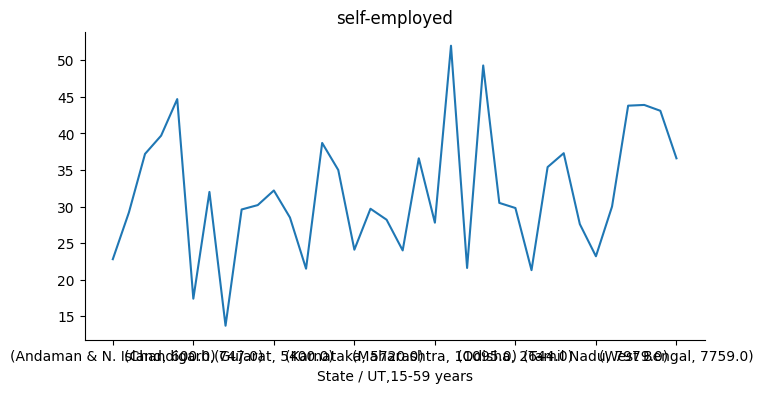

In [ ]:
from matplotlib import pyplot as plt
trend_analysis['self-employed'].plot(kind='line', figsize=(8, 4), title='self-employed')
plt.gca().spines[['top', 'right']].set_visible(False)

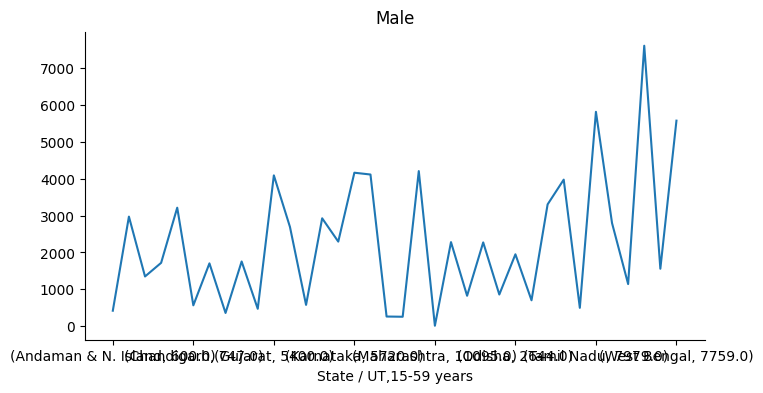

In [ ]:
from matplotlib import pyplot as plt
trend_analysis['Male'].plot(kind='line', figsize=(8, 4), title='Male')
plt.gca().spines[['top', 'right']].set_visible(False)

###Model Fitting
**Model Fitting: Predicting Employment Status**

Fit a logistic regression model to predict the likelihood of being in a particular employment status based on demographic and education variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Prepare the data
# Use OneHotEncoder to create dummy variables for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle potentially unseen categories in test data
encoded_data = encoder.fit_transform(df[['education_level', 'employment_status']])

# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(['education_level', 'employment_status'])

# Create a DataFrame from encoded data with appropriate column names
X = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=feature_names)

y = df['employment_status'].apply(lambda x: 1 if x == 'regular wage /\nsalary earning' else 0)  # Binary classification example

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
